2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
1 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
5 [0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
3 [0, 2, 1, 0, 0, 1, 0, 0, 0, 0]
3 [0, 2, 1, 1, 0, 1, 0, 0, 0, 0]
8 [0, 2, 1, 2, 0, 1, 0, 0, 0, 0]
4 [0, 2, 1, 2, 0, 1, 0, 0, 1, 0]
3 [0, 2, 1, 2, 1, 1, 0, 0, 1, 0]
6 [0, 2, 1, 3, 1, 1, 0, 0, 1, 0]
4 [0, 2, 1, 3, 1, 1, 1, 0, 1, 0]
1 [0, 2, 1, 3, 2, 1, 1, 0, 1, 0]
4 [0, 3, 1, 3, 2, 1, 1, 0, 1, 0]
7 [0, 3, 1, 3, 3, 1, 1, 0, 1, 0]
1 [0, 3, 1, 3, 3, 1, 1, 1, 1, 0]
5 [0, 4, 1, 3, 3, 1, 1, 1, 1, 0]
7 [0, 4, 1, 3, 3, 2, 1, 1, 1, 0]
6 [0, 4, 1, 3, 3, 2, 1, 2, 1, 0]
1 [0, 4, 1, 3, 3, 2, 2, 2, 1, 0]
8 [0, 5, 1, 3, 3, 2, 2, 2, 1, 0]
2 [0, 5, 1, 3, 3, 2, 2, 2, 2, 0]
3 [0, 5, 2, 3, 3, 2, 2, 2, 2, 0]
2 [0, 5, 2, 4, 3, 2, 2, 2, 2, 0]
8 [0, 5, 3, 4, 3, 2, 2, 2, 2, 0]
9 [0, 5, 3, 4, 3, 2, 2, 2, 3, 0]
7 [0, 5, 3, 4, 3, 2, 2, 2, 3, 1]
5 [0, 5, 3, 4, 3, 2, 2, 3, 3, 1]
7 [0, 5, 3, 4, 3, 3, 2, 3, 3, 1]
8 [0, 5, 3, 4, 3, 3, 2, 4, 3, 1]
1 [0, 5, 3, 4, 3, 3, 2, 4, 4, 1]
0 [0, 6, 3

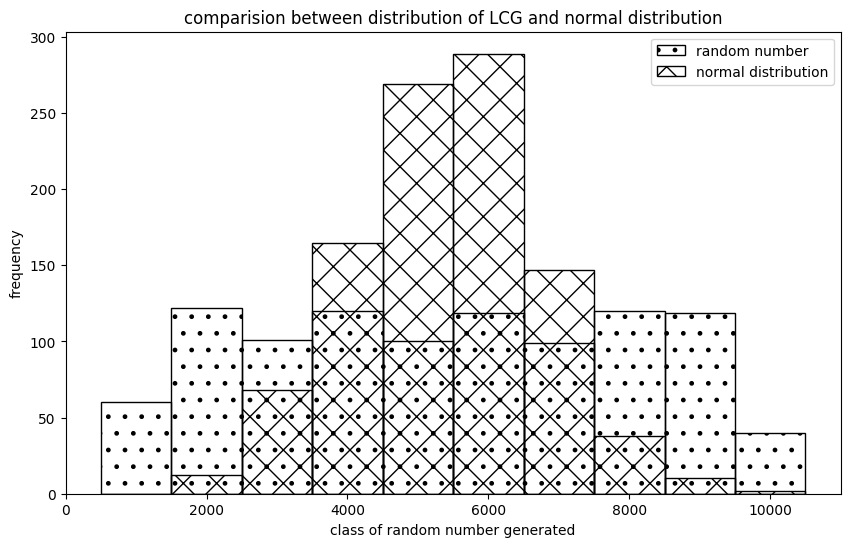

KS Statistic: 0.06976868051518792
P-value: 0.00011198357696367923
The sample is not normally  distributed


In [3]:
'''
Random number generation using LCG method
x(i+1)=(ax(i)+c)mod m
a=34
c=7
m=10000
'''
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import kstest
global largest , smallest
largest =10000
smallest =0
i=1
SampleNum=1000
randomNumber = [0]*SampleNum
x = 10
xAxis = [0]*x
frequencyRandom = [0]*x
frequencyNormal = [0]*x

withOfBar = 1* (largest-smallest)/x

def LCG(num):
    a=34
    c=7
    return ((a*num+c)%largest)

def cumulativeFrequency(data, size):
    frequency = [0]*size
    for i in data:
        index = round(i*(size-1)/(largest-smallest))
        print(index,frequency)
        frequency[index]+=1
 
    return frequency

#generatting random numbers
key = random.randint(smallest,largest)
randomNumber[0]=LCG(key)
while(i<(SampleNum)):
    randomNumber[i]=LCG(randomNumber[i-1])
    i+=1

#genratring normally distributed data
normalValues = np.random.normal(loc=5000, scale=1500,size=SampleNum)


#xaxis for plotting
i=0
while(i<x):
    xAxis[i]=round((i+1)*(largest-smallest)/x)
    i+=1

#finding the cumilitive table for both data
frequencyRandom = cumulativeFrequency(randomNumber,x)
frequencyNormal = cumulativeFrequency(normalValues,x)

# print(xAxis)
# print(randomNumber)
# print(normalValues)
# print(frequencyRandom)
# print(frequencyNormal)

# #ploting
plt.figure(figsize=(10,6))
plt.bar(xAxis,frequencyRandom,width=withOfBar,hatch = '.',fill = False, label = 'random number' )
plt.bar(xAxis,frequencyNormal,width=withOfBar,hatch = 'x',fill = False, label ='normal distribution')
title = 'comparision between distribution of LCG and normal distribution'
plt.title(title)
plt.xlabel('class of random number generated')
plt.ylabel('frequency')
plt.legend()
plt.grid(False)
plt.show()

d, p_value = kstest(randomNumber, 'norm', args=(np.mean(randomNumber), np.std(randomNumber)),N=SampleNum)

print(f"KS Statistic: {d}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("The sample is normally  distributed ")
else:
    print("The sample is not normally  distributed")

